In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

In [2]:
import re
import string
import nltk
import contractions
#from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

from nltk import word_tokenize #tokenizer
nltk.download('punkt') #sentence tokenizer
nltk.download('averaged_perceptron_tagger')

from bs4 import BeautifulSoup
import html as ihtml

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liyanadominguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liyanadominguez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liyanadominguez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/liyanadominguez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load the data

In [3]:
train_csv = pd.read_csv('train.csv', error_bad_lines=False).fillna(' ')
test_csv = pd.read_csv('test.csv', error_bad_lines=False).fillna(' ')
display(train_csv.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_csv

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


# Aggregate toxic labels

In [5]:
# aggregation of toxic labels
train = train_csv
train['general_toxic'] = ((train['toxic'] + train['severe_toxic'] + train['obscene'] + train['threat'] + train['insult'] + train['identity_hate']) > 0).astype(int)
train = train.drop(columns=['toxic', 'severe_toxic', 'severe_toxic', 'threat', 'insult', 'identity_hate', 'obscene'])
display(train[200:250].head()) 

,id,comment_text,general_toxic
200,007f127033d66db5,"""\n\n Link to Sacramento \n\nI placed a wikipe...",0
201,007f1839ada915e6,Your blatant POV pushing \n\nNeither of you gu...,1
202,00803f08f55bdcad,"""\nReliable sources indicate otherwise. Please...",0
203,008198c5a9d85a8e,"I did research thank you very much, and it is ...",0
204,00822d0d01752c7e,"""\n\nA """"TotallyDisputed"""" notice would probab...",0


In [6]:
train[['comment_text', 'general_toxic']]

,comment_text,general_toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


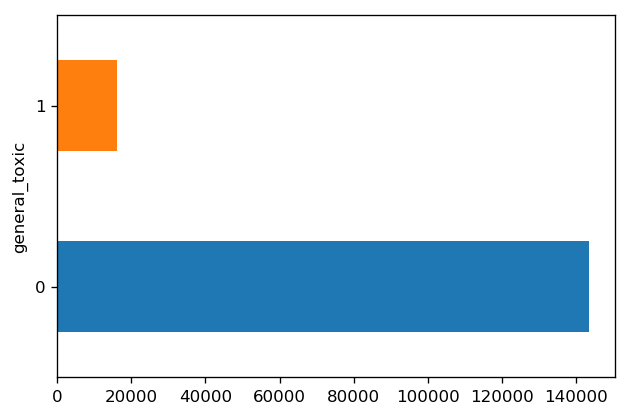

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
train.groupby('general_toxic')['general_toxic'].count().plot(kind='barh', ax=ax)


# Defining functions

In [9]:
# def lemmatize(text):
#     lem = []
#     lem_words = [lemmatizer.lemmatize(x) for x in (text[:][0])]
#     lem.append(lem_words)
#     return lem
def remove_punc(text):
    return ''.join([word for word in text if word not in string.punctuation])

In [10]:
def remove_html(text):
    text = BeautifulSoup(ihtml.unescape(text), "lxml").text
    text = re.sub(r"\s+", " ", text)
    return text
#def remove_contractions(text):
    
def lowercase(text):
    return ''.join(word.lower() for word in text)
#remove_html(train.loc[0, "comment_text"])

# Pre-processing

#### Remove HTML symbols

In [11]:
train['clean'] = train['comment_text'].apply(lambda x: remove_html(x))
train['clean'].head()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://en.wikipedia.org/wiki/Wikipedia_talk:No_original_research/archive15#YouTube_art_as_primary_source" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://finance.yahoo.com/news/7-fascinating-nuggets-another-bewildering-150348488.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://en.wikipedia.org/wiki/Wikipedia:ELYES" looks like a URL. Beautiful Soup is not an HTTP client

0    Explanation Why the edits made under my userna...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    " More I can't make any real suggestions on im...
4    You, sir, are my hero. Any chance you remember...
Name: clean, dtype: object

#### Expand contractions

In [12]:
train['clean_contractions'] = train['clean'].apply(lambda x: contractions.fix(x))
train.head()

,id,comment_text,general_toxic,clean,clean_contractions
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,D'aww! He matches this background colour I'm s...,D'aww! He matches this background colour I am ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,"Hey man, I'm really not trying to edit war. It...","Hey man, I am really not trying to edit war. i..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,""" More I can't make any real suggestions on im...",""" More I can not make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,"You, sir, are my hero. Any chance you remember...","You, sir, are my hero. Any chance you remember..."


#### Check if contractions were properly expanded  (compare clean vs clean_contractions)

In [13]:
train.loc[45, "clean"]

"I don't believe the Lisak criticism present there conforms with the NPV rule. Lisak doesn't have a neutral point of view to begin with. If an offer to polygraph or even concerned review of polygraph results shocks a complainant into thinking her lies have been uncovered, the recantation is still perfectly valid. If you know you are telling the truth, you will argue with machine or investigator. Also part of Kanin's research was a followup of the recanted story where possible to verify if any were false recantations. In all followups the recanted version of events matched what the accused said happened. Arguing that Lisak is a respected PHD is baseless if Kanin is a respected PHD. I agree that my edit wasn't as neutral as possible though, so apologize for that. Still something must be done here."

In [14]:
train.loc[45, "clean_contractions"]

"I do not believe the Lisak criticism present there conforms with the NPV rule. Lisak does not have a neutral point of view to begin with. If an offer to polygraph or even concerned review of polygraph results shocks a complainant into thinking her lies have been uncovered, the recantation is still perfectly valid. If you know you are telling the truth, you will argue with machine or investigator. Also part of Kanin's research was a followup of the recanted story where possible to verify if any were false recantations. In all followups the recanted version of events matched what the accused said happened. Arguing that Lisak is a respected PHD is baseless if Kanin is a respected PHD. I agree that my edit was not as neutral as possible though, so apologize for that. Still something must be done here."

#### Convert everything into lowercase

In [15]:
train['clean'] = train['clean_contractions'].apply(lambda x: lowercase(x))
train['clean'].head()

0    explanation why the edits made under my userna...
1    d'aww! he matches this background colour i am ...
2    hey man, i am really not trying to edit war. i...
3    " more i can not make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: clean, dtype: object

#### Remove the punctuations

In [16]:
train['clean'] = train['clean'].apply(lambda x: remove_punc(x))
train['clean'].head()

0    explanation why the edits made under my userna...
1    daww he matches this background colour i am se...
2    hey man i am really not trying to edit war it ...
3     more i can not make any real suggestions on i...
4    you sir are my hero any chance you remember wh...
Name: clean, dtype: object

#### Tokenization

In [17]:
# Tokenize
train['tokenized'] = train.apply(lambda row: nltk.word_tokenize(row['clean']), axis=1)
train['tokenized'].head()

0    [explanation, why, the, edits, made, under, my...
1    [daww, he, matches, this, background, colour, ...
2    [hey, man, i, am, really, not, trying, to, edi...
3    [more, i, can, not, make, any, real, suggestio...
4    [you, sir, are, my, hero, any, chance, you, re...
Name: tokenized, dtype: object

#### Tokenization with POS tagging

In [18]:
train['pos_tokenized'] = train.apply(lambda row: nltk.pos_tag(row['tokenized']), axis=1)
train['pos_tokenized'].head()

0    [(explanation, NN), (why, WRB), (the, DT), (ed...
1    [(daww, NN), (he, PRP), (matches, VBZ), (this,...
2    [(hey, NN), (man, NN), (i, NN), (am, VBP), (re...
3    [(more, RBR), (i, NNS), (can, MD), (not, RB), ...
4    [(you, PRP), (sir, VBP), (are, VBP), (my, PRP$...
Name: pos_tokenized, dtype: object

#### Lemmatization ( NOT WORKING YET :( )

In [ ]:
lemmatizer = WordNetLemmatizer() 
train['lemmatized'] = train['clean'].apply(lambda x: lemmatizer.lemmatize(x))
train.head()

In [ ]:
train.loc[1000, "lemmatized"]

In [ ]:
train['lemmatized_v'] = train['clean'].apply(lambda x: lemmatizer.lemmatize(x, pos='v'))
train['lemmatized_v'].head()

In [ ]:
train.loc[1000, "lemmatized_v"]

In [ ]:
#Using CountVectorizer
# pipeline = Pipeline([('vectorizer', CountVectorizer(max_df=0.5,
#                                                    min_df=4,
#                                                    tokenizer='[a-zA-Z]+')),
#                     ('clf', MultinomialNB())], verbose=True)
# pipeline.fit(train['comment_text'], train['general_toxic'])

In [ ]:
#Using TfidVectorizer; COPY PASTED FROM https://www.kaggle.com/piumallick/toxic-comments-sentiment-analysis
#for reference only
vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                             max_df=0.5,
                             min_df=4,
                             max_features=1000)
vector_space_model = vectorizer.fit_transform(train['comment_text'].values.astype('U').tolist()) # converting the dtype object to unicode string 
n_comments = vector_space_model.shape[0]
print('%d Total Comments' % n_comments)